<a href="https://colab.research.google.com/github/atsu8864/Graduation-Research/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%AE%E7%A2%BA%E3%81%8B%E3%82%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()

In [ ]:
predictions

array([[ 0.10597391, -0.43221065, -1.1134396 ,  0.21624494, -0.71961826,
        -0.06927142,  0.00445221, -0.46166036,  0.04820062,  0.40640038]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.12441458, 0.07263412, 0.03675248, 0.13891892, 0.05449054,
        0.10441507, 0.11240379, 0.07052626, 0.11743043, 0.16801375]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.2593813

In [ ]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9854


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0724 - accuracy: 0.9786


[0.0723738819360733, 0.978600025177002]

In [ ]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [ ]:

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.8164333e-10, 2.4005242e-10, 6.3364268e-08, 5.4533425e-06,
        2.7893215e-12, 2.2475093e-10, 1.7565657e-14, 9.9999416e-01,
        4.6853130e-09, 1.8037137e-07],
       [4.1107114e-11, 6.6178786e-06, 9.9999309e-01, 2.9361632e-07,
        1.5177470e-20, 4.1447540e-11, 6.5817776e-15, 4.6426318e-18,
        6.2869800e-11, 8.4376914e-18],
       [1.8773881e-07, 9.9996114e-01, 5.7412194e-07, 1.0370734e-08,
        1.7612435e-06, 7.5837736e-09, 3.1419422e-08, 3.4059132e-05,
        2.2638637e-06, 2.4932845e-10],
       [9.9966133e-01, 1.8961481e-08, 1.8283802e-04, 8.0993906e-10,
        7.2875474e-07, 2.0574575e-05, 7.1856884e-06, 2.9541798e-06,
        7.6173791e-08, 1.2424550e-04],
       [4.5988889e-07, 8.2426438e-13, 1.9111756e-08, 3.4585076e-12,
        9.9973148e-01, 2.9041250e-11, 2.0258368e-07, 1.2602176e-06,
        1.4257844e-10, 2.6653122e-04]], dtype=float32)>

neural network

In [ ]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

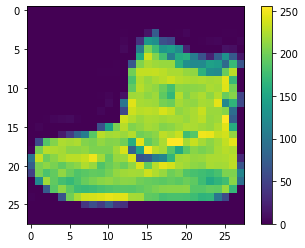

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

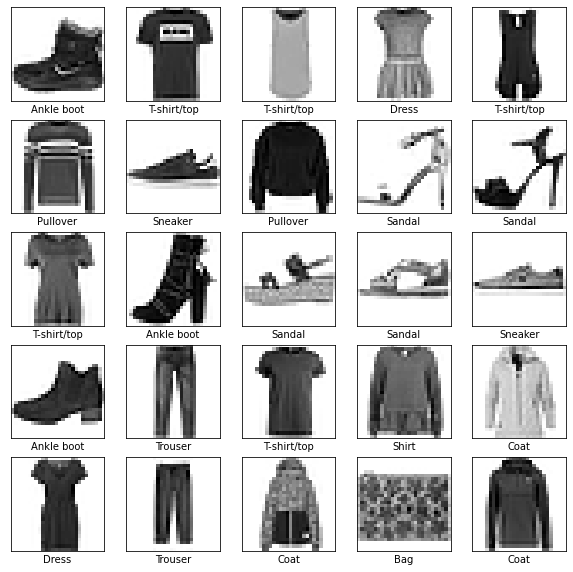

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4998 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8906


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3777 - accuracy: 0.8622

Test accuracy: 0.8622000217437744


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([7.04312561e-06, 4.74652362e-09, 4.82990643e-08, 1.66942566e-08,
       1.16879896e-07, 9.42949962e-04, 6.42198472e-07, 1.72023922e-02,
       3.72027966e-06, 9.81843054e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
       color = 'blue'  
    else:
       color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),
                                        class_names[true_label]),color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

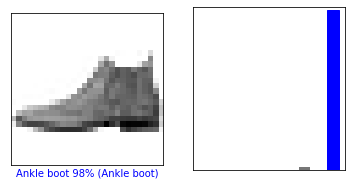

In [ ]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

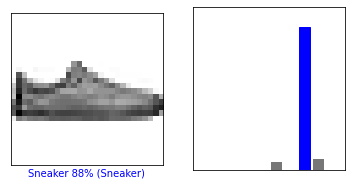

In [ ]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

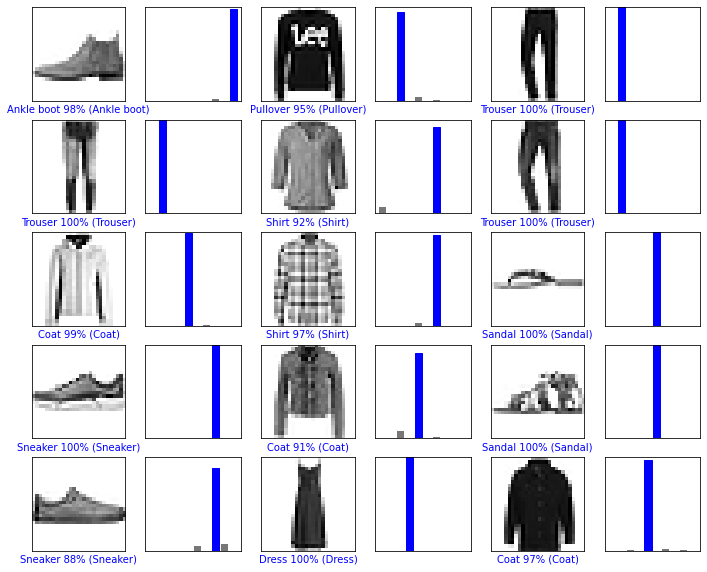

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.0431388e-06 4.7465236e-09 4.8299064e-08 1.6694194e-08 1.1687956e-07
  9.4295223e-04 6.4219790e-07 1.7202383e-02 3.7202760e-06 9.8184305e-01]]


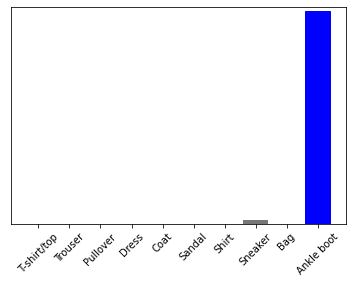

In [ ]:
plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_names, rotation = 45)

In [ ]:
np.argmax(predictions_single[0])

9

In [ ]:
import functools

import numpy as np
import tensorflow as tf

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
np.set_printoptions(precision=3, suppress=True)

In [ ]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


In [ ]:
LABELS = [0, 1]
LABEL_COLUMN = 'survived'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [ ]:
?tfds.load

In [ ]:
builder = tfds.builder('mnist')
builder.download_and_prepare()
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [ ]:
ds = ds.take(1)

for example in ds:
    print(list(example.keys()))
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:
    print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
for image, label in tfds.as_numpy(ds):
    print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


In [ ]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))
print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


In [ ]:
ds, info = tfds.load('mnist', split='train', with_info=True)
tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


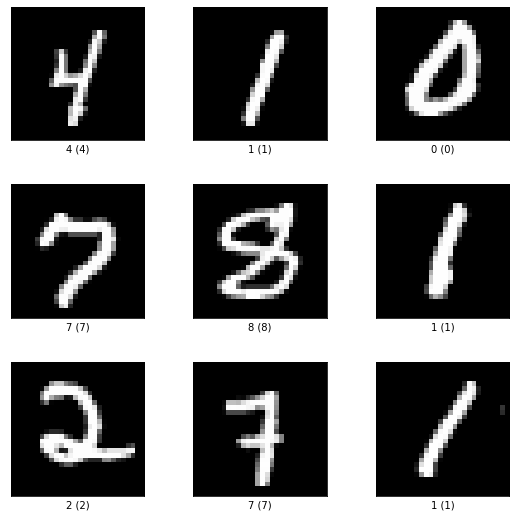

In [ ]:
ds, info = tfds.load('mnist', split='train', with_info=True)
fig = tfds.show_examples(ds, info)

In [ ]:
builder = tfds.builder('mnist')
info = builder.info

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [ ]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


In [ ]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


In [ ]:
print(info.splits)

{'test': <tfds.core.SplitInfo num_examples=10000>, 'train': <tfds.core.SplitInfo num_examples=60000>}


In [ ]:
print(list(info.splits.keys()))

['test', 'train']
